In [1]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
import os

In [2]:
# read in csv
read_file = os.path.join("Resources", "life_expectancy_data_region.csv")
life = pd.read_csv(read_file)
life

,Country,Year,Region,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Eastern Mediterranean,Developing,65.0,263.0,62,0.01,71.279624,65.0,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Eastern Mediterranean,Developing,59.9,271.0,64,0.01,73.523582,62.0,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Eastern Mediterranean,Developing,59.9,268.0,66,0.01,73.219243,64.0,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Eastern Mediterranean,Developing,59.5,272.0,69,0.01,78.184215,67.0,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Eastern Mediterranean,Developing,59.2,275.0,71,0.01,7.097109,68.0,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Africa,Developing,44.3,723.0,27,4.36,0.000000,68.0,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Africa,Developing,44.5,715.0,26,4.06,0.000000,7.0,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Africa,Developing,44.8,73.0,25,4.43,0.000000,73.0,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Africa,Developing,45.3,686.0,25,1.72,0.000000,76.0,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [3]:
country_count = life["Country"].nunique()
print(f"There are a total of {country_count} unique countries in our dataset.")
region = life["Region"].nunique()
print(f"The {country_count} countries are sorted into {region} different regions, as defined by the WHO.")

There are a total of 193 unique countries in our dataset.
The 193 countries are sorted into 6 different regions, as defined by the WHO.


In [4]:
# get index of df to easily select columns to filter and help with renaming
life.columns

Index(['Country', 'Year', 'Region', 'Status', 'Life expectancy ',
       'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
       'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio',
       'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [5]:
# rename columns
life_df = life.rename(columns= {"Life expectancy ": "Life Expectancy (yrs)",
                                "Total expenditure": "Total Expenditure (%)",
                                  })
life_df

,Country,Year,Region,Status,Life Expectancy (yrs),Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,...,Polio,Total Expenditure (%),Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Eastern Mediterranean,Developing,65.0,263.0,62,0.01,71.279624,65.0,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Eastern Mediterranean,Developing,59.9,271.0,64,0.01,73.523582,62.0,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Eastern Mediterranean,Developing,59.9,268.0,66,0.01,73.219243,64.0,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Eastern Mediterranean,Developing,59.5,272.0,69,0.01,78.184215,67.0,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Eastern Mediterranean,Developing,59.2,275.0,71,0.01,7.097109,68.0,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Africa,Developing,44.3,723.0,27,4.36,0.000000,68.0,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Africa,Developing,44.5,715.0,26,4.06,0.000000,7.0,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Africa,Developing,44.8,73.0,25,4.43,0.000000,73.0,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Africa,Developing,45.3,686.0,25,1.72,0.000000,76.0,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [6]:
life_df.columns

Index(['Country', 'Year', 'Region', 'Status', 'Life Expectancy (yrs)',
       'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
       'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio',
       'Total Expenditure (%)', 'Diphtheria ', ' HIV/AIDS', 'GDP',
       'Population', ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [7]:
# trim dataset to focus on the impact Total Expenditure has on the Life Expectancy by country 
trim_df = life_df[['Region', 'Country', 'Year', 'Status', 'Life Expectancy (yrs)',
              'Total Expenditure (%)']]
trim_df

,Region,Country,Year,Status,Life Expectancy (yrs),Total Expenditure (%)
0,Eastern Mediterranean,Afghanistan,2015,Developing,65.0,8.16
1,Eastern Mediterranean,Afghanistan,2014,Developing,59.9,8.18
2,Eastern Mediterranean,Afghanistan,2013,Developing,59.9,8.13
3,Eastern Mediterranean,Afghanistan,2012,Developing,59.5,8.52
4,Eastern Mediterranean,Afghanistan,2011,Developing,59.2,7.87
...,...,...,...,...,...,...
2933,Africa,Zimbabwe,2004,Developing,44.3,7.13
2934,Africa,Zimbabwe,2003,Developing,44.5,6.52
2935,Africa,Zimbabwe,2002,Developing,44.8,6.53
2936,Africa,Zimbabwe,2001,Developing,45.3,6.16


In [8]:
# get count for each column in the trimmed df
trim_df.count()

Region                   2938
Country                  2938
Year                     2938
Status                   2938
Life Expectancy (yrs)    2928
Total Expenditure (%)    2712
dtype: int64

In [9]:
trim_df = trim_df.dropna()

In [10]:
trim_df.count()

Region                   2702
Country                  2702
Year                     2702
Status                   2702
Life Expectancy (yrs)    2702
Total Expenditure (%)    2702
dtype: int64

In [11]:
# remove rows where = Total Expenditure (%)
spending_df = trim_df.loc[trim_df["Total Expenditure (%)"] >0]
spending_df

,Region,Country,Year,Status,Life Expectancy (yrs),Total Expenditure (%)
0,Eastern Mediterranean,Afghanistan,2015,Developing,65.0,8.16
1,Eastern Mediterranean,Afghanistan,2014,Developing,59.9,8.18
2,Eastern Mediterranean,Afghanistan,2013,Developing,59.9,8.13
3,Eastern Mediterranean,Afghanistan,2012,Developing,59.5,8.52
4,Eastern Mediterranean,Afghanistan,2011,Developing,59.2,7.87
...,...,...,...,...,...,...
2933,Africa,Zimbabwe,2004,Developing,44.3,7.13
2934,Africa,Zimbabwe,2003,Developing,44.5,6.52
2935,Africa,Zimbabwe,2002,Developing,44.8,6.53
2936,Africa,Zimbabwe,2001,Developing,45.3,6.16


In [12]:
dev_df = spending_df.loc[spending_df["Status"] == "Developed"]
dev_df

,Region,Country,Year,Status,Life Expectancy (yrs),Total Expenditure (%)
113,Western Pacific,Australia,2014,Developed,82.7,9.42
114,Western Pacific,Australia,2013,Developed,82.5,9.36
115,Western Pacific,Australia,2012,Developed,82.3,9.36
116,Western Pacific,Australia,2011,Developed,82.0,9.20
117,Western Pacific,Australia,2010,Developed,81.9,9.20
...,...,...,...,...,...,...
2805,Americas,United States of America,2004,Developed,77.5,15.14
2806,Americas,United States of America,2003,Developed,77.2,15.60
2807,Americas,United States of America,2002,Developed,77.0,14.55
2808,Americas,United States of America,2001,Developed,76.9,13.73


In [13]:
undev_df = spending_df.loc[spending_df["Status"] == "Developing"]
undev_df

,Region,Country,Year,Status,Life Expectancy (yrs),Total Expenditure (%)
0,Eastern Mediterranean,Afghanistan,2015,Developing,65.0,8.16
1,Eastern Mediterranean,Afghanistan,2014,Developing,59.9,8.18
2,Eastern Mediterranean,Afghanistan,2013,Developing,59.9,8.13
3,Eastern Mediterranean,Afghanistan,2012,Developing,59.5,8.52
4,Eastern Mediterranean,Afghanistan,2011,Developing,59.2,7.87
...,...,...,...,...,...,...
2933,Africa,Zimbabwe,2004,Developing,44.3,7.13
2934,Africa,Zimbabwe,2003,Developing,44.5,6.52
2935,Africa,Zimbabwe,2002,Developing,44.8,6.53
2936,Africa,Zimbabwe,2001,Developing,45.3,6.16


In [14]:
dev_df["Region"].unique()

array(['Western Pacific', 'Europe', 'Americas'], dtype=object)

In [15]:
dev_df["Country"].unique()

array(['Australia', 'Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus',
       'Czechia', 'Denmark', 'Germany', 'Hungary', 'Iceland', 'Ireland',
       'Italy', 'Japan', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta',
       'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal',
       'Romania', 'Singapore', 'Slovakia', 'Slovenia', 'Spain', 'Sweden',
       'Switzerland',
       'United Kingdom of Great Britain and Northern Ireland',
       'United States of America'], dtype=object)

In [16]:
undev_df["Region"].unique()

array(['Eastern Mediterranean', 'Europe', 'Africa', 'Americas',
       'South-East Asia', 'Western Pacific'], dtype=object)

In [17]:
names = undev_df["Country"].unique()
count = undev_df["Country"].nunique()
print(names, count)

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belize' 'Benin' 'Bhutan'
 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'Brunei Darussalam' 'Burkina Faso' 'Burundi' "Côte d'Ivoire"
 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada' 'Central African Republic'
 'Chad' 'Chile' 'China' 'Colombia' 'Comoros' 'Congo' 'Costa Rica' 'Cuba'
 'Democratic Republic of the Congo' 'Djibouti' 'Dominican Republic'
 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Ghana'
 'Greece' 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti'
 'Honduras' 'India' 'Indonesia' 'Iran (Islamic Republic of)' 'Iraq'
 'Israel' 'Jamaica' 'Jordan' 'Kazakhstan' 'Kenya' 'Kiribati' 'Kuwait'
 'Kyrgyzstan' "Lao People's Democratic Republic" 'Lebanon' 'Lesotho'
 'Liberia' 'Libya' 'Madagascar' 'M

In [18]:
import seaborn as sns
spending_df.head()

,Region,Country,Year,Status,Life Expectancy (yrs),Total Expenditure (%)
0,Eastern Mediterranean,Afghanistan,2015,Developing,65.0,8.16
1,Eastern Mediterranean,Afghanistan,2014,Developing,59.9,8.18
2,Eastern Mediterranean,Afghanistan,2013,Developing,59.9,8.13
3,Eastern Mediterranean,Afghanistan,2012,Developing,59.5,8.52
4,Eastern Mediterranean,Afghanistan,2011,Developing,59.2,7.87


In [19]:
# look at one developing nation through the years
malawi_df = undev_df.loc[undev_df["Country"] == "Malawi"]
malawi_df

,Region,Country,Year,Status,Life Expectancy (yrs),Total Expenditure (%)
1571,Africa,Malawi,2014,Developing,57.6,11.38
1572,Africa,Malawi,2013,Developing,56.7,1.96
1573,Africa,Malawi,2012,Developing,55.3,12.60
1574,Africa,Malawi,2011,Developing,54.1,11.67
1575,Africa,Malawi,2010,Developing,52.9,1.50
1576,Africa,Malawi,2009,Developing,51.5,1.18
1577,Africa,Malawi,2008,Developing,50.0,1.70
1578,Africa,Malawi,2007,Developing,48.5,9.31
1579,Africa,Malawi,2006,Developing,47.1,8.99
1580,Africa,Malawi,2005,Developing,46.0,8.20


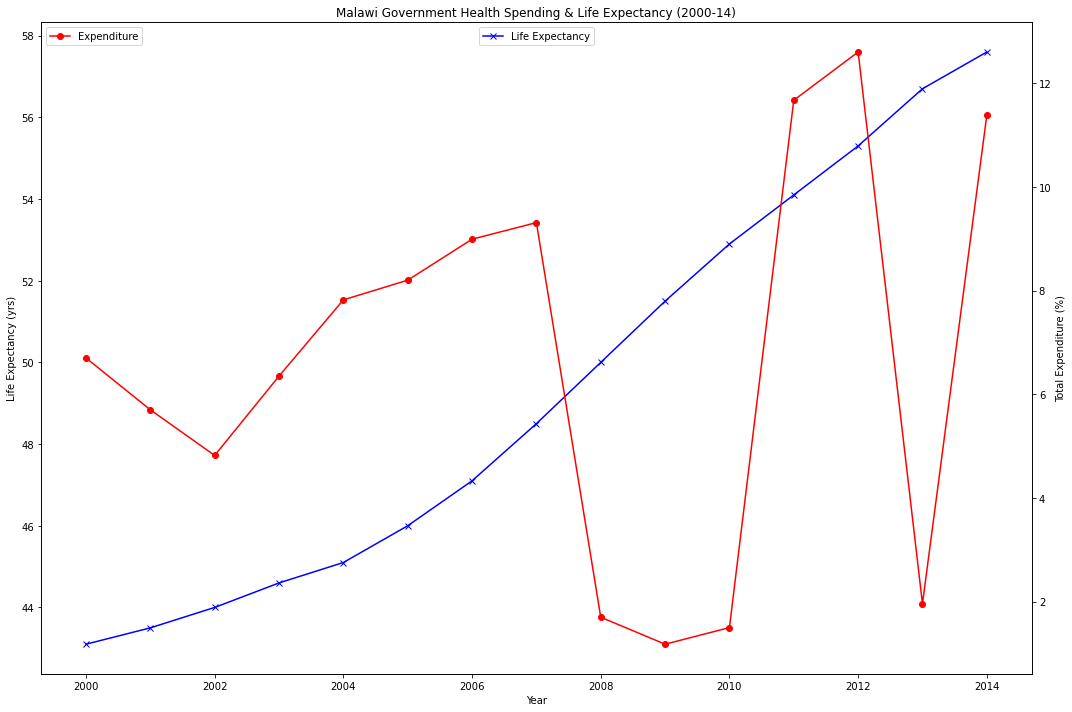

In [49]:
# plot gov expenditure and life expectancy over the years for Malawi (developing country)
fig, ax = plt.subplots(figsize =(15,10))

# twin object for dual y-axes on the same plot 
ax2 = ax.twinx()

# plot first y axis
line1 = ax.plot(malawi_df["Year"], malawi_df["Life Expectancy (yrs)"], color = "blue", marker = "x", label = "Life Expectancy")

#set x axis label
ax.set_xlabel("Year")
# set first y axis label 
ax.set_ylabel("Life Expectancy (yrs)")

# plot second y axis
line2 = ax2.plot(malawi_df["Year"], malawi_df["Total Expenditure (%)"], color = "red", marker = "o", label="Expenditure")
# set second y axis label
ax2.set_ylabel("Total Expenditure (%)")

ax.set_title("Malawi Government Health Spending & Life Expectancy (2000-14)")

ax.legend(loc = "upper center")
ax2.legend(loc = "upper left")

#save fig and display fig
plt.savefig("Images/MalawiExpenditure.png")
plt.tight_layout()
plt.show()


In [ ]:
# https://www.who.int/data/gho/whs-2020-visual-summary
# https://apps.who.int/gho/data/node.main.HEALTHFINANCING?lang=en
# https://apps.who.int/gho/data/node.main.HEALTHFINANCING